# Computer Simulations of Random Variables and Monte Carlo Studies
## Inverse Transform Method, Rejection Method, Special Methods

In [40]:
import numpy as np
from scipy.stats import geom

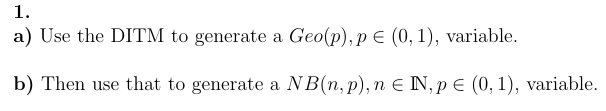

## a)

### Geometric distribution formula
$X \sim Geo(p)$, p - success % on each trial </br>
pmf: $P(X = k) = \left(1 - p\right)^k \cdot p$ </br>
cdf: $F(x) = P(x \le k) = 1 - (1 - p)^{k+1}$ </br>
### DITM
$$1 - (1 - p)^{k+1} \ge U$$ </br>
$$(k+1)ln\left(1-p\right) \le ln (1 - U)$$ </br>
$$k \ge \frac{ln\left(1-U\right)}{ln\left(1-p\right)} - 1,\ since\ ln\left(1-p\right) \lt 0$$ </br>
$$1 - U\ can\ be\ written\ as\ U,\ then\ X = \left[ \frac{ln(U)}{ln(1-p)} - 1\right]$$

In [83]:
U = np.random.uniform(0, 1, size=5000)
p = 0.5
# to get the number of trials until success including the success
# X1 = np.floor(np.log(U) / np.log(1 - p) - 1) 

# number of trials trials excluding the success
X1 = np.floor(np.log(U) / np.log(1 - p)) 
np.mean(X1)

1.0048

In [82]:
# number of trials excluding the success
X2 = geom.rvs(p=0.5, size=5000) - 1 
np.mean(X2)

1.0038

# b)

In [ ]:
### Geometric distribution formula
$X \sim Geo(p)$, p - success % on each trial </br>
pmf: $P(X = k) = \left(1 - p\right)^k \cdot p$ </br>
cdf: $F(x) = P(x \le k) = 1 - (1 - p)^{k+1}$ </br>
### DITM
$$1 - (1 - p)^{k+1} \ge U$$ </br>
$$(k+1)ln\left(1-p\right) \le ln (1 - U)$$ </br>
$$k \ge \frac{ln\left(1-U\right)}{ln\left(1-p\right)} - 1,\ since\ ln\left(1-p\right) \lt 0$$ </br>
$$1 - U\ can\ be\ written\ as\ U,\ then\ X = \left[ \frac{ln(U)}{ln(1-p)} - 1\right]$$

Theoretical mean: 11.6667
Sample mean:     11.8091

Theoretical variance: 38.8889
Sample variance:     41.0325


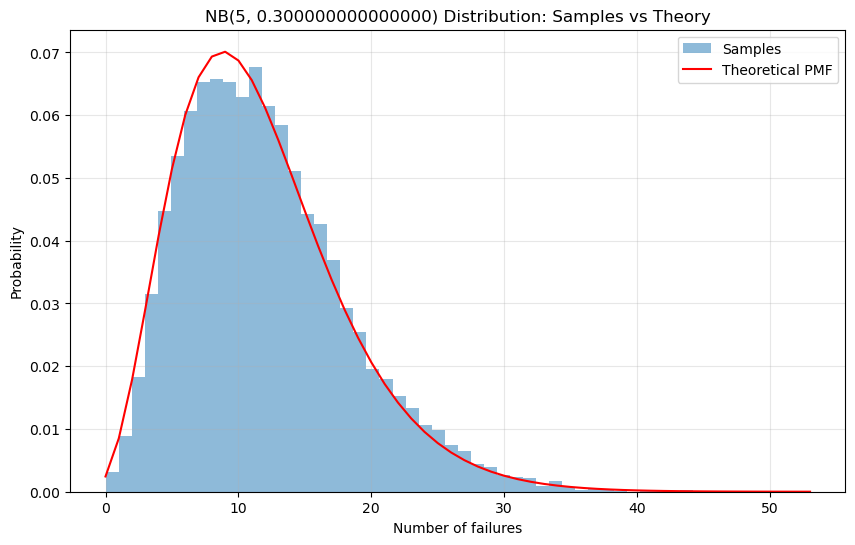

In [85]:
import numpy as np
from scipy.stats import nbinom

def sample_nb_inverse_transform(n, p, size=1):
    """
    Generate samples from NB(n,p) using inverse transform method
    
    Parameters:
    n (int): Number of successes required
    p (float): Probability of success
    size (int): Number of samples to generate
    
    Returns:
    numpy array: Samples from NB(n,p)
    """
    # Generate uniform random numbers
    u = np.random.uniform(0, 1, size)
    samples = np.zeros_like(u, dtype=int)
    
    # For each uniform random number
    for i, u_i in enumerate(u):
        x = 0
        cdf_value = nbinom.cdf(x, n, p)
        
        # Keep incrementing x until we find F(x) ≥ u
        while cdf_value < u_i:
            x += 1
            cdf_value = nbinom.cdf(x, n, p)
        
        samples[i] = x
    
    return samples

# Parameters
n, p = 5, 0.3
sample_size = 10000

# Generate samples
samples = sample_nb_inverse_transform(n, p, sample_size)

# Compare theoretical vs sampled moments
theoretical_mean = n * (1-p) / p
theoretical_var = n * (1-p) / (p**2)

sample_mean = np.mean(samples)
sample_var = np.var(samples)

print(f"Theoretical mean: {theoretical_mean:.4f}")
print(f"Sample mean:     {sample_mean:.4f}")
print(f"\nTheoretical variance: {theoretical_var:.4f}")
print(f"Sample variance:     {sample_var:.4f}")

# Optional: Plot histogram of samples vs theoretical PMF
import matplotlib.pyplot as plt

x = np.arange(0, max(samples) + 1)
pmf = nbinom.pmf(x, n, p)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=len(x), density=True, alpha=0.5, label='Samples')
plt.plot(x, pmf, 'r-', label='Theoretical PMF')
plt.xlabel('Number of failures')
plt.ylabel('Probability')
plt.title(f'NB({n}, {p}) Distribution: Samples vs Theory')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()